# Create a Campaign with Item-meta Data

In [46]:
import boto3
from time import sleep
import subprocess
import pandas as pd
import json
import time
import pprint
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [47]:
# 다른 노트북에서 저장된 변수들을 불러옴
%store -r
# itme_meta_suffix
# item_meta_prophet_predictor_arn
# item_meta_deepar_predictor_arn

In [48]:
session = boto3.Session(region_name=region)
forecast = session.client(service_name='forecast')
forecast_query = session.client(service_name='forecastquery')

## Create Prophet and DeepAR+ Campaign

In [49]:
item_meta_prophet_predictor_arn = 'arn:aws:forecast:us-east-2:057716757052:predictor/WalmartKaggle_prophet_algo_1_ItemM38922'
item_meta_deepar_predictor_arn = 'arn:aws:forecast:us-east-2:057716757052:predictor/WalmartKaggle_deeparp_algo_1_ItemM38922'

In [50]:
# Prophet
item_meta_prophet_forecastName = project+'_prophet_algo_forecast' + itme_meta_suffix + suffix
prophet_create_forecast_response=forecast.create_forecast(
    ForecastName = item_meta_prophet_forecastName,
    PredictorArn = item_meta_prophet_predictor_arn)


In [51]:
item_meta_prophet_forecast_arn = prophet_create_forecast_response['ForecastArn']
forecast.describe_forecast(ForecastArn = item_meta_prophet_forecast_arn)

{'ForecastArn': 'arn:aws:forecast:us-east-2:057716757052:forecast/WalmartKaggle_prophet_algo_forecast_ItemM38922',
 'ForecastName': 'WalmartKaggle_prophet_algo_forecast_ItemM38922',
 'ForecastTypes': ['0.1', '0.5', '0.9'],
 'PredictorArn': 'arn:aws:forecast:us-east-2:057716757052:predictor/WalmartKaggle_prophet_algo_1_ItemM38922',
 'DatasetGroupArn': 'arn:aws:forecast:us-east-2:057716757052:dataset-group/WalmartKaggleDSG_ItemM38922',
 'Status': 'CREATE_PENDING',
 'CreationTime': datetime.datetime(2020, 3, 26, 10, 47, 59, 336000, tzinfo=tzlocal()),
 'LastModificationTime': datetime.datetime(2020, 3, 26, 10, 47, 59, 336000, tzinfo=tzlocal()),
 'ResponseMetadata': {'RequestId': '80b506db-31d7-41c7-abdd-22e393406bbf',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'content-type': 'application/x-amz-json-1.1',
   'date': 'Thu, 26 Mar 2020 10:47:59 GMT',
   'x-amzn-requestid': '80b506db-31d7-41c7-abdd-22e393406bbf',
   'content-length': '520',
   'connection': 'keep-alive'},
  'RetryAttempts': 0

In [52]:
# DeepAR+
item_meta_deeparp_forecastName = project+'_deeparp_algo_forecast' + itme_meta_suffix + suffix
deeparp_create_forecast_response=forecast.create_forecast(
    ForecastName = item_meta_deeparp_forecastName,
    PredictorArn = item_meta_deepar_predictor_arn)


In [53]:
item_meta_deeparp_forecast_arn = deeparp_create_forecast_response['ForecastArn']
forecast.describe_forecast(ForecastArn = item_meta_deeparp_forecast_arn)

{'ForecastArn': 'arn:aws:forecast:us-east-2:057716757052:forecast/WalmartKaggle_deeparp_algo_forecast_ItemM38922',
 'ForecastName': 'WalmartKaggle_deeparp_algo_forecast_ItemM38922',
 'ForecastTypes': ['0.1', '0.5', '0.9'],
 'PredictorArn': 'arn:aws:forecast:us-east-2:057716757052:predictor/WalmartKaggle_deeparp_algo_1_ItemM38922',
 'DatasetGroupArn': 'arn:aws:forecast:us-east-2:057716757052:dataset-group/WalmartKaggleDSG_ItemM38922',
 'Status': 'CREATE_PENDING',
 'CreationTime': datetime.datetime(2020, 3, 26, 10, 48, 0, 938000, tzinfo=tzlocal()),
 'LastModificationTime': datetime.datetime(2020, 3, 26, 10, 48, 0, 938000, tzinfo=tzlocal()),
 'ResponseMetadata': {'RequestId': '67c48da7-f9f5-4ba0-a5d5-51b3edd1c4d6',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'content-type': 'application/x-amz-json-1.1',
   'date': 'Thu, 26 Mar 2020 10:48:00 GMT',
   'x-amzn-requestid': '67c48da7-f9f5-4ba0-a5d5-51b3edd1c4d6',
   'content-length': '520',
   'connection': 'keep-alive'},
  'RetryAttempts': 0}}

In [54]:
item_meta_prophet_forecast_arn = 'arn:aws:forecast:us-east-2:057716757052:forecast/WalmartKaggleGonsoo_prophet_algo_forecast_ItemM05471'
item_meta_deeparp_forecast_arn = 'arn:aws:forecast:us-east-2:057716757052:forecast/WalmartKaggleGonsoo_deeparp_algo_forecast_ItemM05471'

In [78]:
item_meta_deeparp_forecast_arn = 'arn:aws:forecast:us-east-2:057716757052:forecast/WalmartKaggle_deeparp_algo_forecast_ItemM38922'
item_meta_prophet_forecast_arn = 'arn:aws:forecast:us-east-2:057716757052:forecast/WalmartKaggle_prophet_algo_forecast_ItemM38922'

In [79]:
%%time
# Check the Prophet status

while True:
    createProphetStatus = forecast.describe_forecast(ForecastArn= item_meta_prophet_forecast_arn)['Status']
    createDeeparpStatus = forecast.describe_forecast(ForecastArn= item_meta_deeparp_forecast_arn)['Status']    
    print("Prophet: ", createProphetStatus)
    print("DeepARP: ", createProphetStatus)          
    if createProphetStatus != 'ACTIVE' and createProphetStatus != 'CREATE_FAILED':
        sleep(60)
    elif createDeeparpStatus != 'ACTIVE' and createDeeparpStatus != 'CREATE_FAILED':
        sleep(60)
    else:
        break

Prophet:  CREATE_IN_PROGRESS
DeepARP:  CREATE_IN_PROGRESS
Prophet:  CREATE_IN_PROGRESS
DeepARP:  CREATE_IN_PROGRESS
Prophet:  CREATE_IN_PROGRESS
DeepARP:  CREATE_IN_PROGRESS
Prophet:  CREATE_IN_PROGRESS
DeepARP:  CREATE_IN_PROGRESS
Prophet:  CREATE_IN_PROGRESS
DeepARP:  CREATE_IN_PROGRESS
Prophet:  CREATE_IN_PROGRESS
DeepARP:  CREATE_IN_PROGRESS
Prophet:  CREATE_IN_PROGRESS
DeepARP:  CREATE_IN_PROGRESS
Prophet:  CREATE_IN_PROGRESS
DeepARP:  CREATE_IN_PROGRESS
Prophet:  CREATE_IN_PROGRESS
DeepARP:  CREATE_IN_PROGRESS
Prophet:  CREATE_IN_PROGRESS
DeepARP:  CREATE_IN_PROGRESS
Prophet:  CREATE_IN_PROGRESS
DeepARP:  CREATE_IN_PROGRESS
Prophet:  CREATE_IN_PROGRESS
DeepARP:  CREATE_IN_PROGRESS
Prophet:  CREATE_IN_PROGRESS
DeepARP:  CREATE_IN_PROGRESS
Prophet:  CREATE_IN_PROGRESS
DeepARP:  CREATE_IN_PROGRESS
Prophet:  CREATE_IN_PROGRESS
DeepARP:  CREATE_IN_PROGRESS
Prophet:  ACTIVE
DeepARP:  ACTIVE
Prophet:  ACTIVE
DeepARP:  ACTIVE
Prophet:  ACTIVE
DeepARP:  ACTIVE
Prophet:  ACTIVE
DeepARP:  A

## Upload forecast results to S3

In [80]:
meta_data_prophet_path = "s3://" + bucket_name + "/prophet_" + itme_meta_suffix + suffix + "/" 
meta_data_prophet_job_name = "ProphetExport1" + itme_meta_suffix + suffix
create_forecast_export_job_prophet_response = forecast.create_forecast_export_job(
    ForecastExportJobName = meta_data_prophet_job_name,
    ForecastArn = item_meta_prophet_forecast_arn,
    Destination={
        "S3Config" : {
            "Path": meta_data_prophet_path,
            "RoleArn": role_arn
        }
    })


In [81]:
ItemMetaForecastProphetExportJobArn = create_forecast_export_job_prophet_response["ForecastExportJobArn"]
forecast.describe_forecast_export_job(ForecastExportJobArn = ItemMetaForecastProphetExportJobArn)

{'ForecastExportJobArn': 'arn:aws:forecast:us-east-2:057716757052:forecast-export-job/WalmartKaggle_prophet_algo_forecast_ItemM38922/ProphetExport1_ItemM38922',
 'ForecastExportJobName': 'ProphetExport1_ItemM38922',
 'ForecastArn': 'arn:aws:forecast:us-east-2:057716757052:forecast/WalmartKaggle_prophet_algo_forecast_ItemM38922',
 'Destination': {'S3Config': {'Path': 's3://walmart-forecast/prophet__ItemM38922',
   'RoleArn': 'arn:aws:iam::057716757052:role/WalmartForecast'}},
 'Status': 'CREATE_PENDING',
 'CreationTime': datetime.datetime(2020, 3, 26, 11, 16, 25, 85000, tzinfo=tzlocal()),
 'LastModificationTime': datetime.datetime(2020, 3, 26, 11, 16, 25, 85000, tzinfo=tzlocal()),
 'ResponseMetadata': {'RequestId': '6dca86b1-0796-4ce0-a8da-9be15cfe5bb7',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'content-type': 'application/x-amz-json-1.1',
   'date': 'Thu, 26 Mar 2020 11:16:25 GMT',
   'x-amzn-requestid': '6dca86b1-0796-4ce0-a8da-9be15cfe5bb7',
   'content-length': '560',
   'connecti

In [82]:
item_meta_deeparp_path = "s3://" + bucket_name + "/deeparp_" + itme_meta_suffix + suffix + "/" 
item_meta_deeparp_job_name = "DeepARPExport1" + itme_meta_suffix + suffix
create_forecast_export_job_deepar_response = forecast.create_forecast_export_job(
    ForecastExportJobName=item_meta_deeparp_job_name,
    ForecastArn=item_meta_deeparp_forecast_arn,
    Destination={
        "S3Config" : {
            "Path": item_meta_deeparp_path,
            "RoleArn": role_arn
        }
    })

In [83]:
ItemMetaForecastDeeparExportJobArn = create_forecast_export_job_deepar_response["ForecastExportJobArn"]
forecast.describe_forecast_export_job(ForecastExportJobArn = ItemMetaForecastDeeparExportJobArn)

{'ForecastExportJobArn': 'arn:aws:forecast:us-east-2:057716757052:forecast-export-job/WalmartKaggle_deeparp_algo_forecast_ItemM38922/DeepARPExport1_ItemM38922',
 'ForecastExportJobName': 'DeepARPExport1_ItemM38922',
 'ForecastArn': 'arn:aws:forecast:us-east-2:057716757052:forecast/WalmartKaggle_deeparp_algo_forecast_ItemM38922',
 'Destination': {'S3Config': {'Path': 's3://walmart-forecast/deeparp__ItemM38922',
   'RoleArn': 'arn:aws:iam::057716757052:role/WalmartForecast'}},
 'Status': 'CREATE_PENDING',
 'CreationTime': datetime.datetime(2020, 3, 26, 11, 16, 25, 313000, tzinfo=tzlocal()),
 'LastModificationTime': datetime.datetime(2020, 3, 26, 11, 16, 25, 313000, tzinfo=tzlocal()),
 'ResponseMetadata': {'RequestId': 'c3b746ca-b2ab-44c9-adac-45aac97872d0',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'content-type': 'application/x-amz-json-1.1',
   'date': 'Thu, 26 Mar 2020 11:16:24 GMT',
   'x-amzn-requestid': 'c3b746ca-b2ab-44c9-adac-45aac97872d0',
   'content-length': '560',
   'connec

In [84]:
%%time
# Check the Prophet status

while True:
    createProphetStatus = forecast.describe_forecast_export_job(ForecastExportJobArn= ItemMetaForecastProphetExportJobArn)['Status']
    createDeeparpStatus = forecast.describe_forecast_export_job(ForecastExportJobArn= ItemMetaForecastDeeparExportJobArn)['Status']    
    print("Prophet: ", createProphetStatus)
    print("DeepARP: ", createProphetStatus)          
    if createProphetStatus != 'ACTIVE' and createProphetStatus != 'CREATE_FAILED':
        sleep(60)
    elif createDeeparpStatus != 'ACTIVE' and createDeeparpStatus != 'CREATE_FAILED':
        sleep(60)
    else:
        break

Prophet:  CREATE_PENDING
DeepARP:  CREATE_PENDING
Prophet:  CREATE_IN_PROGRESS
DeepARP:  CREATE_IN_PROGRESS
Prophet:  CREATE_IN_PROGRESS
DeepARP:  CREATE_IN_PROGRESS
Prophet:  CREATE_IN_PROGRESS
DeepARP:  CREATE_IN_PROGRESS
Prophet:  CREATE_IN_PROGRESS
DeepARP:  CREATE_IN_PROGRESS
Prophet:  ACTIVE
DeepARP:  ACTIVE
CPU times: user 52.6 ms, sys: 345 µs, total: 53 ms
Wall time: 5min


This exporting process is another one of those items that will take several minutes to complete. Just poll for progress in the console. From the earlier page where you saw the status turn `Active` for a Forecast, click it and you can see the progress of the export.

In [85]:
%store prophet_forecast_arn
%store deeparp_forecast_arn
%store ForecastProphetExportJobArn
%store ForecastDeeparExportJobArn



Stored 'prophet_forecast_arn' (str)
Stored 'deeparp_forecast_arn' (str)
Stored 'ForecastProphetExportJobArn' (str)
Stored 'ForecastDeeparExportJobArn' (str)


## Obtaining the forecast results from S3

At this point they are all exported into S3 but you need to obtain the results locally so we can explore them, the cells below will do that starting with ARIMA, then Prophet, and lastly DeepAR+.

In [86]:
validation_df = validation_stores_sales.copy()

In [87]:
# Prophet
s3 = boto3.resource('s3')
poc_bucket = boto3.resource('s3').Bucket(bucket_name)
prefix = "prophet_" + itme_meta_suffix + suffix
prophet_filename = ""
prophet_files = list(poc_bucket.objects.filter(Prefix=prefix))
print("prophet_files: ", prophet_files)
for file in prophet_files:
    # There will be a collection of CSVs if the forecast is large, modify this to go get them all
    if "csv" in file.key:
        prophet_filename = file.key.split('/')[1]
        s3.Bucket(bucket_name).download_file(file.key, data_dir+"/"+prophet_filename)
print(prophet_filename)

prophet_files:  [s3.ObjectSummary(bucket_name='walmart-forecast', key='prophet__ItemM38922/ProphetExport1_ItemM38922_2020-03-26T11-20-59Z_part0.csv'), s3.ObjectSummary(bucket_name='walmart-forecast', key='prophet__ItemM38922/_CHECK'), s3.ObjectSummary(bucket_name='walmart-forecast', key='prophet__ItemM38922/_SUCCESS')]
ProphetExport1_ItemM38922_2020-03-26T11-20-59Z_part0.csv


In [88]:
# DeepAR+
s3 = boto3.resource('s3')
poc_bucket = boto3.resource('s3').Bucket(bucket_name)
prefix = "deeparp_" + itme_meta_suffix + suffix
deeparp_filename = ""
deeparp_files = list(poc_bucket.objects.filter(Prefix=prefix))
for file in deeparp_files:
    # There will be a collection of CSVs if the forecast is large, modify this to go get them all
    if "csv" in file.key:
        deeparp_filename = file.key.split('/')[1]
        s3.Bucket(bucket_name).download_file(file.key, data_dir+"/"+deeparp_filename)
print(deeparp_filename)

DeepARPExport1_ItemM38922_2020-03-26T11-17-20Z_part0.csv


## Prepare validation file

In [89]:
validation_df = validation_stores_sales.copy()
validation_df.reset_index(inplace=True) # reset index
validation_df = validation_df.rename(columns={'index':'date'}) # Change column name to date
validation_df.date = pd.to_datetime(validation_df.date, format= '%Y-%m-%d') # Change a format of yyyy-mm-dd
print(validation_df.dtypes)
validation_df.head()


date            datetime64[ns]
Weekly_Sales           float64
item_id                 object
dtype: object


,date,Weekly_Sales,item_id
0,2010-02-08,1643690.90,1
1,2010-02-15,1641957.44,1
2,2010-02-22,1611968.17,1
3,2010-03-01,1409727.59,1
4,2010-03-08,1554806.68,1


## Load forecast results from local folder 

In [90]:
prophet_predicts_s3 = pd.read_csv(data_dir + "/" + prophet_filename)
deeparp_predicts_s3 = pd.read_csv(data_dir + "/" + deeparp_filename)
# prophet_predicts_s3.head()


In [91]:
# Remove the timezone
prophet_predicts = prophet_predicts_s3.copy()
# Important
# Because Monday starts for forecasting, in order to be the same as Friday on Validation data
# Add foure days
prophet_predicts['date'] = pd.to_datetime(prophet_predicts['date']) # + pd.DateOffset(days=4)
prophet_predicts['date'] = prophet_predicts['date'].dt.tz_convert(None) # Convert time zone
prophet_predicts.date = pd.to_datetime(prophet_predicts.date, format= '%Y-%m-%d') # Change a format of yyyy-mm-dd
# prophet_predicts.date = prophet_predicts.date.dt.strftime("%Y-%m-%d") 
# print(prophet_predicts.date.dtypes)
# print(prophet_predicts.head())

# prophet_predicts.set_index('date', inplace=True)
prophet_predicts.item_id = prophet_predicts.item_id.astype(str) # convert to string type
prophet_predicts = prophet_predicts[['date','item_id','p10', 'p50', 'p90']]
# prophet_predicts = prophet_predicts[prophet_predicts.item_id == "1"] # only for itme_id == 1
prophet_predicts.head()
# prophet_predicts.dtypes

,date,item_id,p10,p50,p90
0,2012-07-30,7,657107.459134,703088.178484,754600.268356
1,2012-08-06,7,650634.282521,715799.945658,766812.845872
2,2012-08-13,7,652897.446497,719359.100448,779447.253766
3,2012-08-20,7,623792.882130,684071.134942,745180.264497
4,2012-08-27,7,594196.846584,650032.913589,720306.413125


In [92]:
# Remove the timezone
deeparp_predicts = deeparp_predicts_s3.copy()
# Important
# Because Monday starts for forecasting, in order to be the same as Friday on Validation data
# Add foure days
deeparp_predicts['date'] = pd.to_datetime(deeparp_predicts['date']) # + pd.DateOffset(days=4)
deeparp_predicts['date'] = deeparp_predicts['date'].dt.tz_convert(None) # Convert time zone
deeparp_predicts.date = pd.to_datetime(deeparp_predicts.date, format= '%Y-%m-%d') # Change a format of yyyy-mm-dd
# prophet_predicts.date = prophet_predicts.date.dt.strftime("%Y-%m-%d") 
# print(prophet_predicts.date.dtypes)
# print(prophet_predicts.head())

# prophet_predicts.set_index('date', inplace=True)
deeparp_predicts.item_id = deeparp_predicts.item_id.astype(str) # convert to string type
deeparp_predicts = deeparp_predicts[['date','item_id','p10', 'p50', 'p90']]
# deeparp_predicts = deeparp_predicts[deeparp_predicts.item_id == "1"] # only for itme_id == 1
deeparp_predicts.head()
# prophet_predicts.dtypes

,date,item_id,p10,p50,p90
0,2012-07-30,7,556428.31250,602262.9375,661033.1250
1,2012-08-06,7,542100.18750,601454.3750,659146.9375
2,2012-08-13,7,549313.62500,606769.3125,657649.8125
3,2012-08-20,7,522656.40625,586045.0625,638080.1875
4,2012-08-27,7,544197.50000,590656.0625,637446.5625


## Join forecast results with validation data

In [93]:
prophet_val_df = pd.merge(prophet_predicts,validation_df, 
#                           on=['date', 'item_id'], 
                          on=['date', 'item_id'], 
                          how='inner')
                          
prophet_val_df.set_index('date', inplace=True)
prophet_val_df.head(10)

,item_id,p10,p50,p90,Weekly_Sales
date,,,,,
2012-07-30,7,657107.459134,703088.178484,754600.268356,686365.40
2012-08-06,7,650634.282521,715799.945658,766812.845872,680954.81
2012-08-13,7,652897.446497,719359.100448,779447.253766,675926.30
2012-08-20,7,623792.882130,684071.134942,745180.264497,642450.40
2012-08-27,7,594196.846584,650032.913589,720306.413125,609099.37
2012-09-03,7,600670.019167,667538.502137,727189.731592,586467.16
2012-09-10,7,578231.274631,653844.038775,712689.023538,597876.55
2012-09-17,7,552436.349925,624003.308418,680065.627926,541120.20
2012-09-24,7,523628.931080,574328.940948,641997.603429,530842.25


In [94]:
deeparp_val_df = pd.merge(deeparp_predicts,validation_df, 
#                           on=['date', 'item_id'], 
                          on=['date', 'item_id'], 
                          how='inner')
                          
deeparp_val_df.set_index('date', inplace=True)
deeparp_val_df.head(10)

,item_id,p10,p50,p90,Weekly_Sales
date,,,,,
2012-07-30,7,556428.31250,602262.9375,661033.1250,686365.40
2012-08-06,7,542100.18750,601454.3750,659146.9375,680954.81
2012-08-13,7,549313.62500,606769.3125,657649.8125,675926.30
2012-08-20,7,522656.40625,586045.0625,638080.1875,642450.40
2012-08-27,7,544197.50000,590656.0625,637446.5625,609099.37
2012-09-03,7,519442.43750,579723.9375,640397.6250,586467.16
2012-09-10,7,525410.50000,581297.1250,647112.3125,597876.55
2012-09-17,7,512678.53125,573065.3750,651066.0000,541120.20
2012-09-24,7,520087.34375,570389.0625,663698.0000,530842.25


#### An example of single forecast

In [95]:
# forecast_query_response = forecast_query.query_forecast(
#     ForecastArn = prophet_forecast_arn,
#     StartDate = "2012-01-02T00:00:00",
#     EndDate = "2012-01-10T00:00:00",
#     Filters={"item_id": "1"}
# )
# forecast_query_response

## Analyse prophet and deepar+ for all stores

In [96]:
from utils import show_two_chart_horizontal

item_id    int64
dtype: object


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


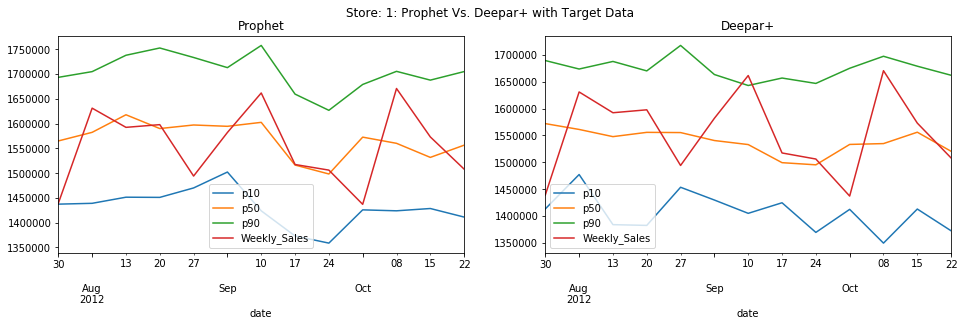

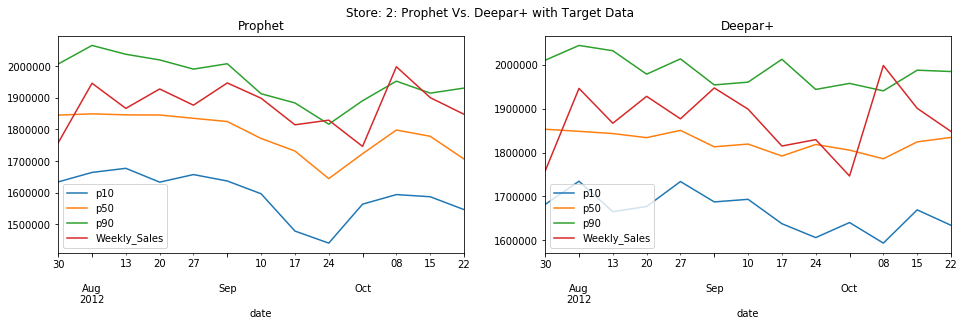

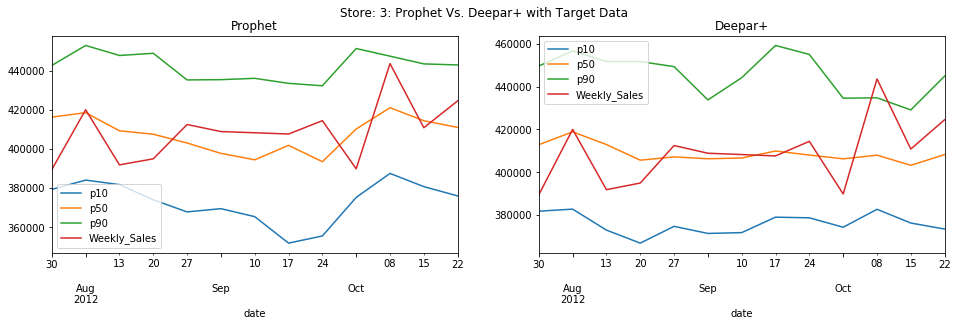

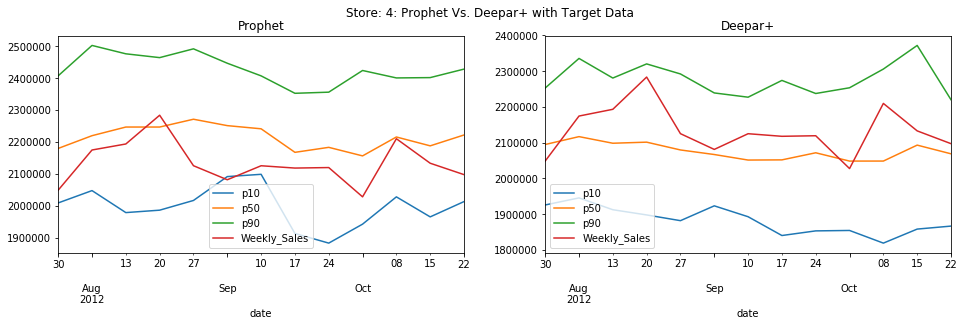

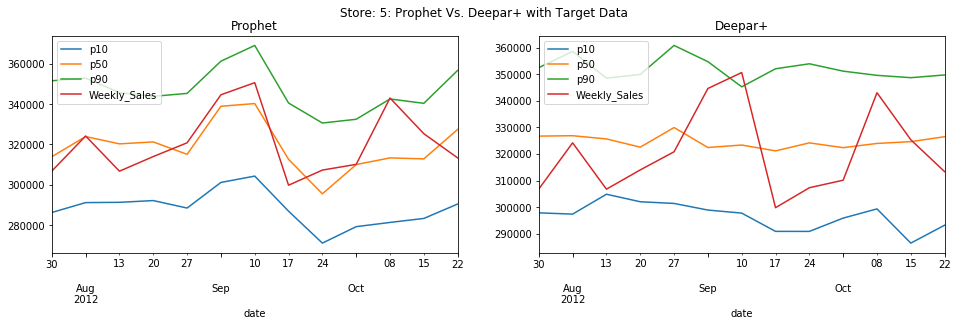

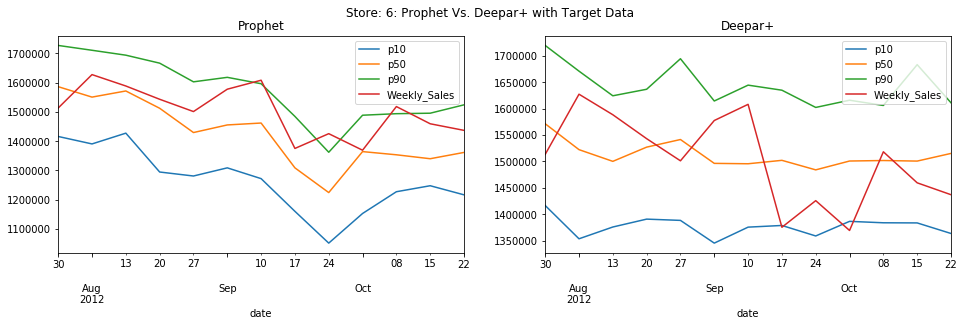

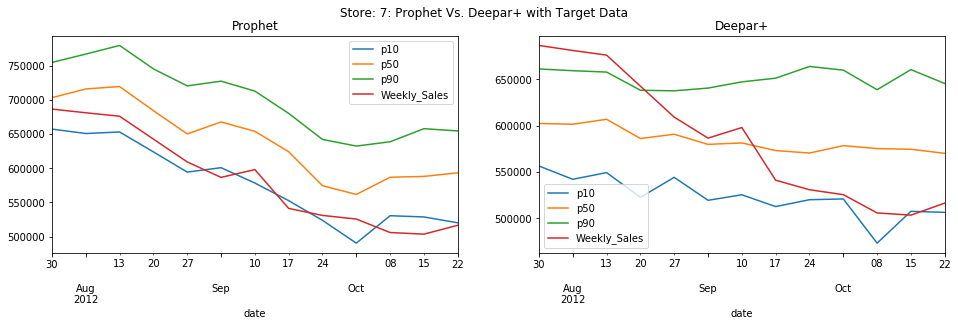

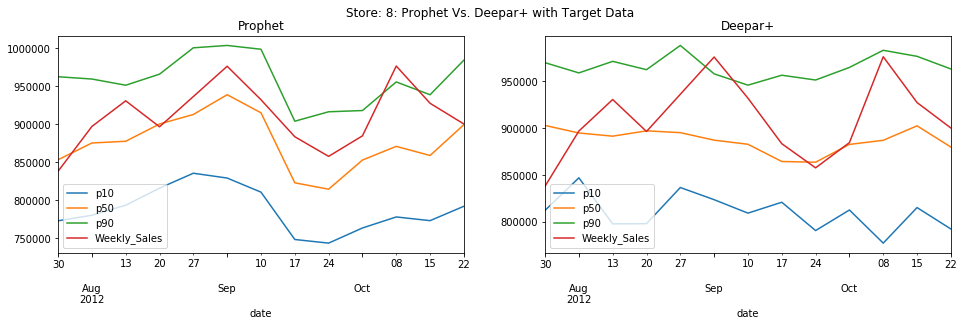

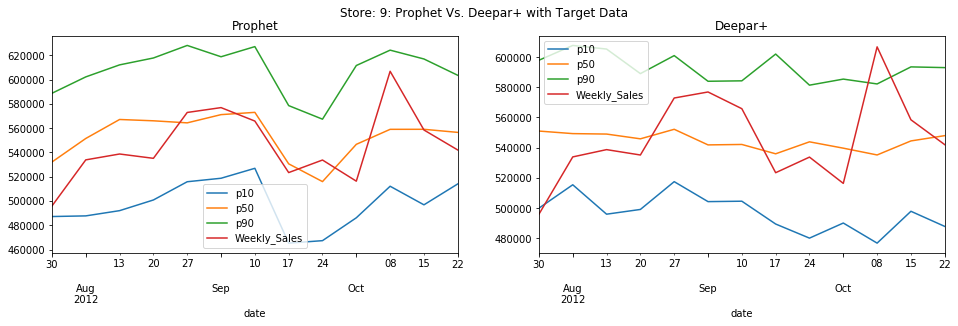

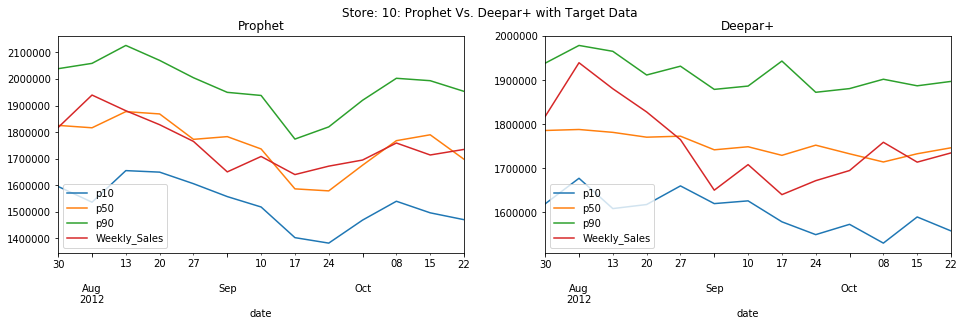

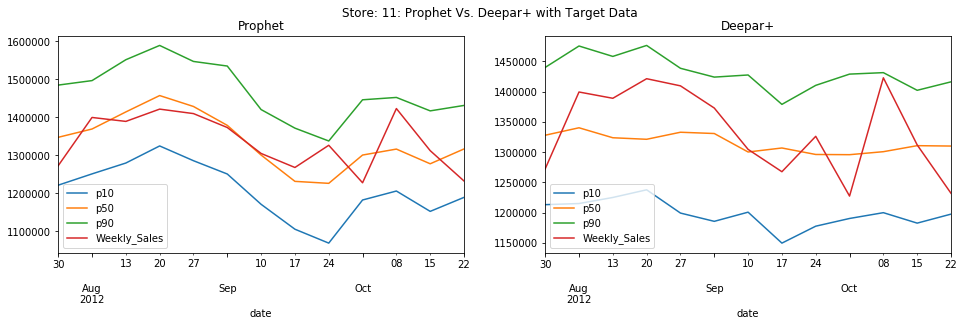

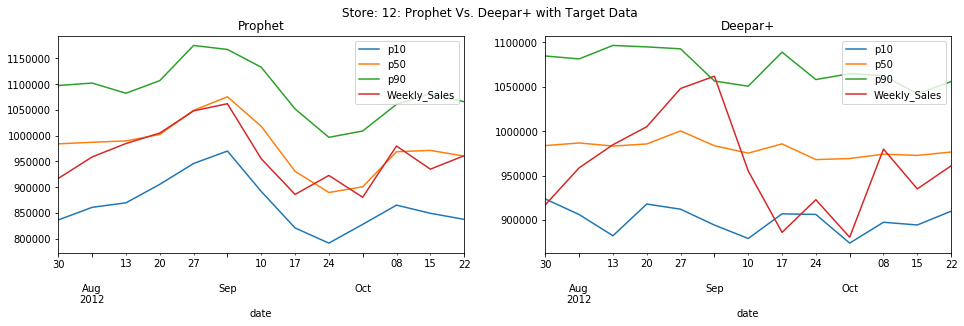

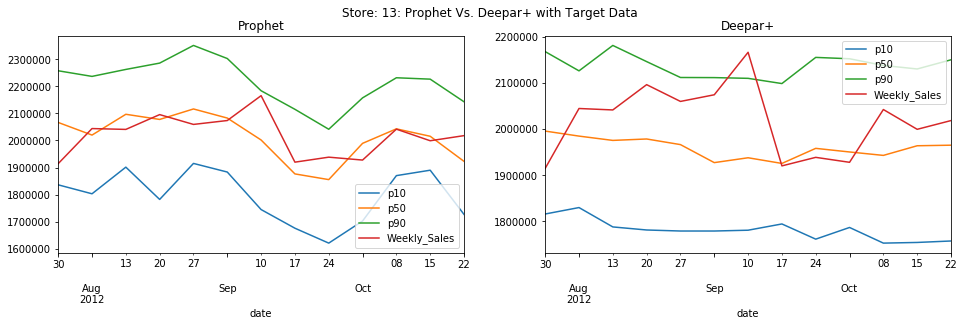

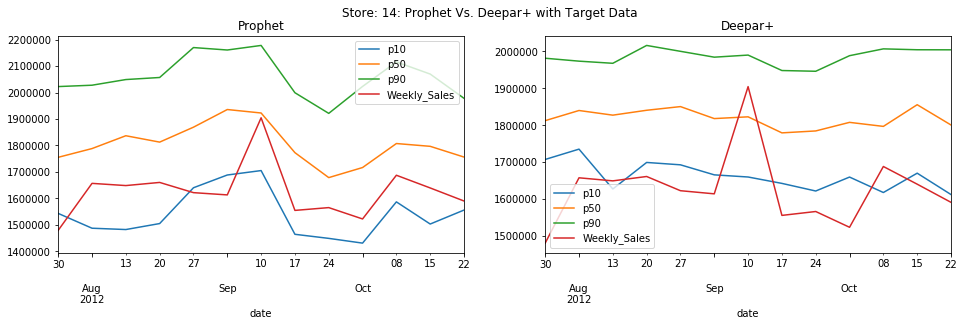

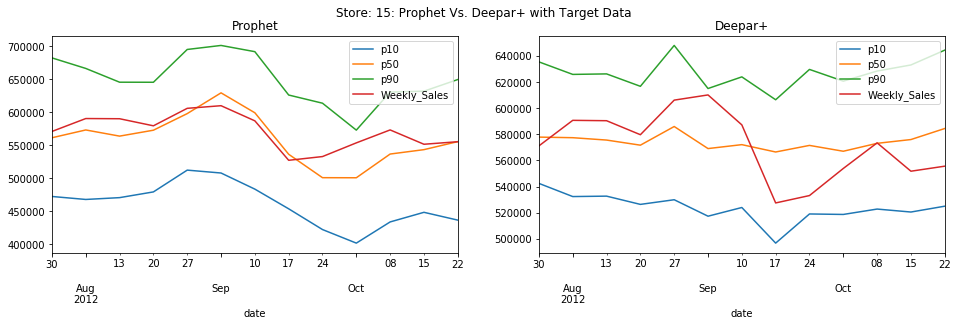

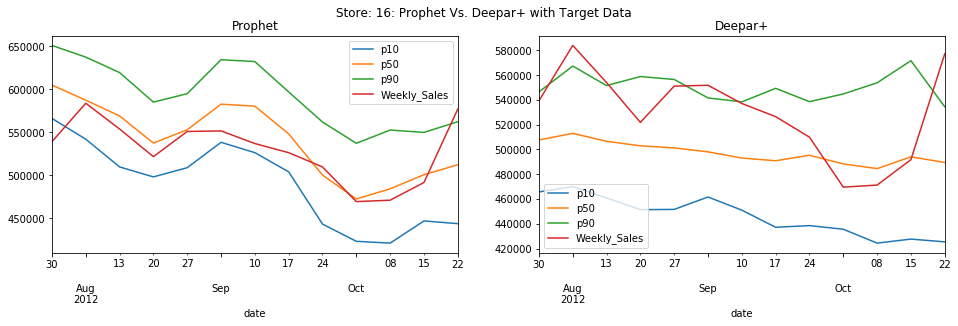

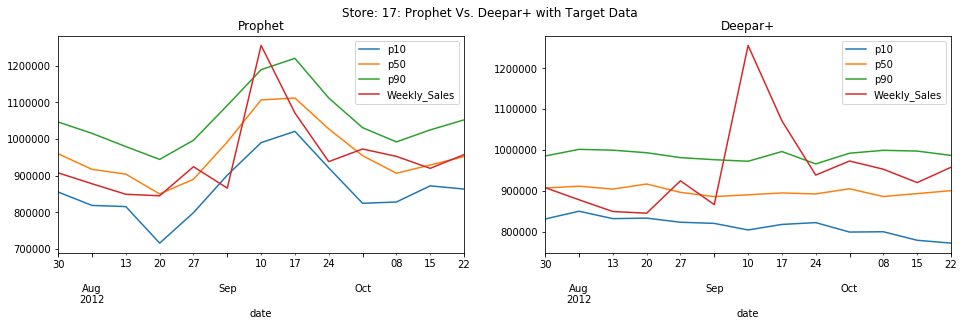

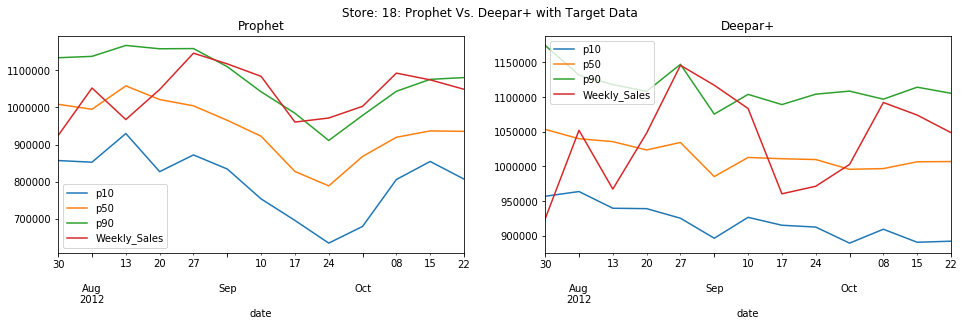

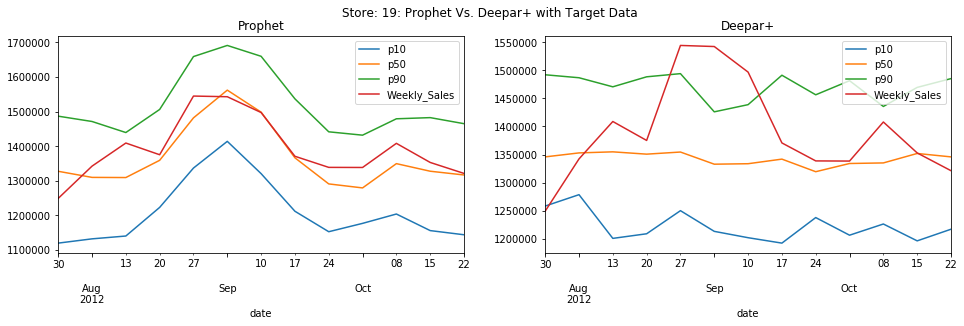

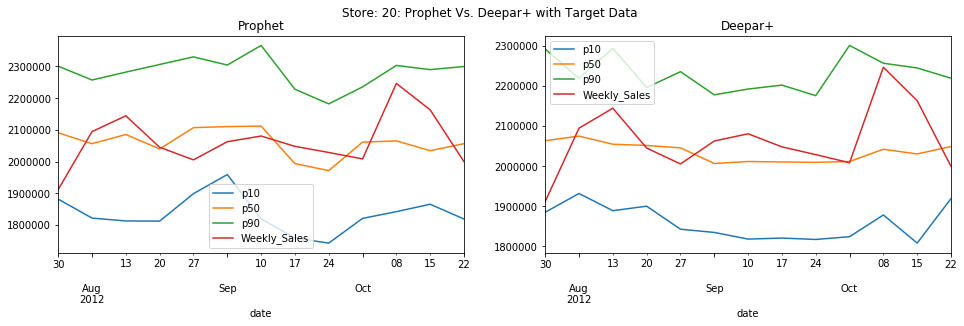

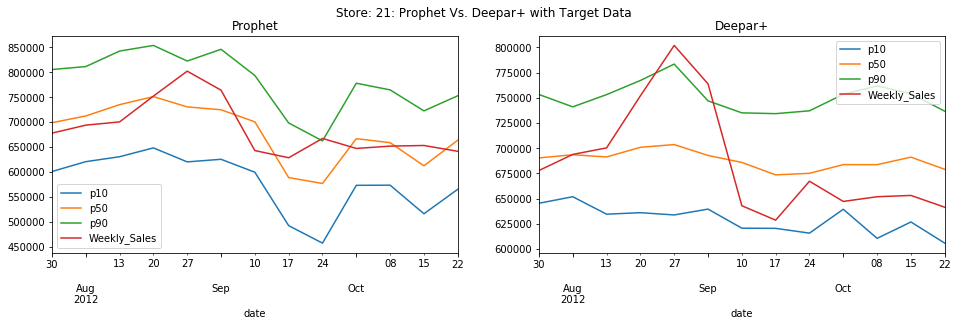

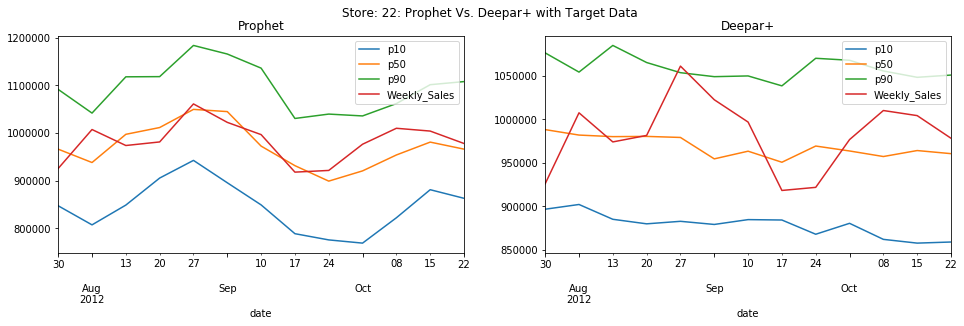

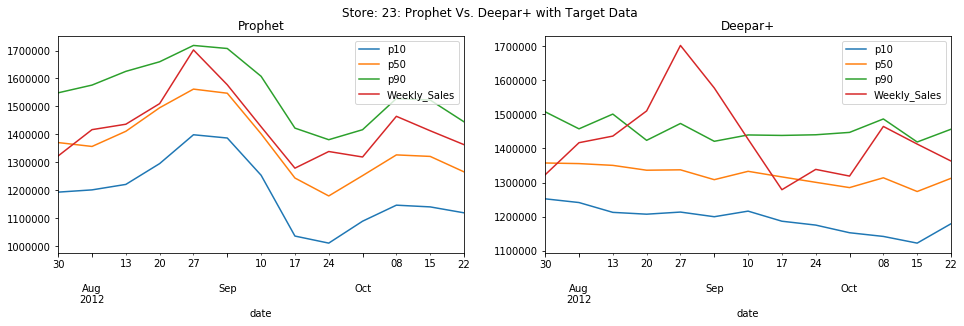

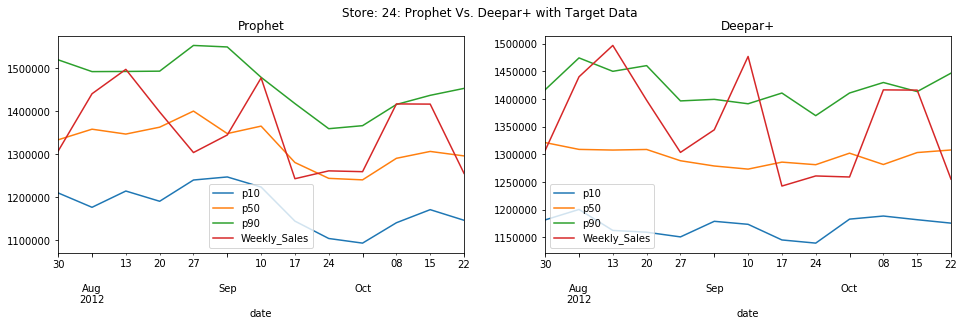

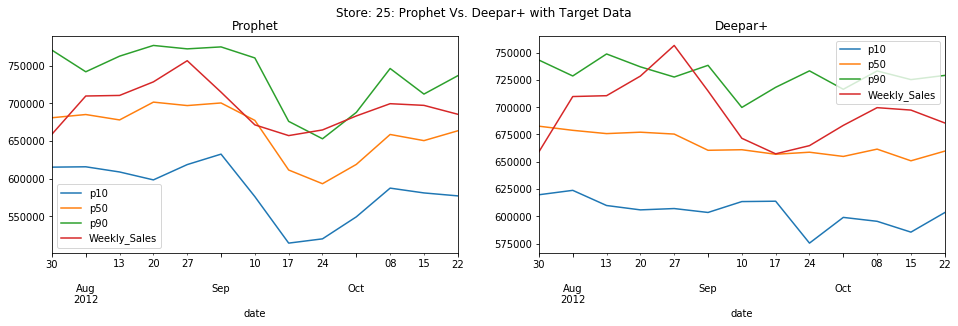

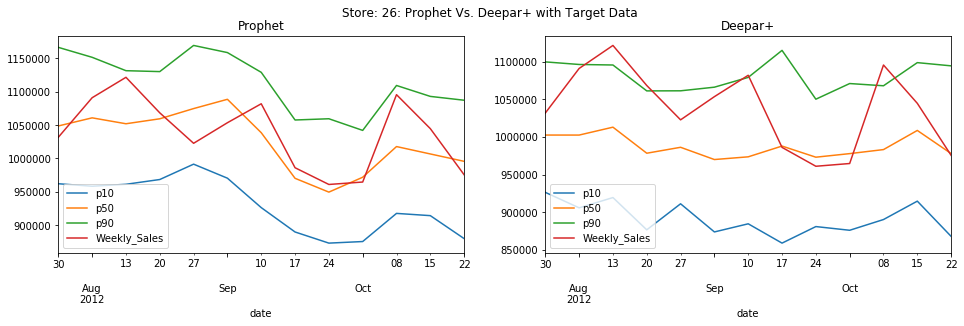

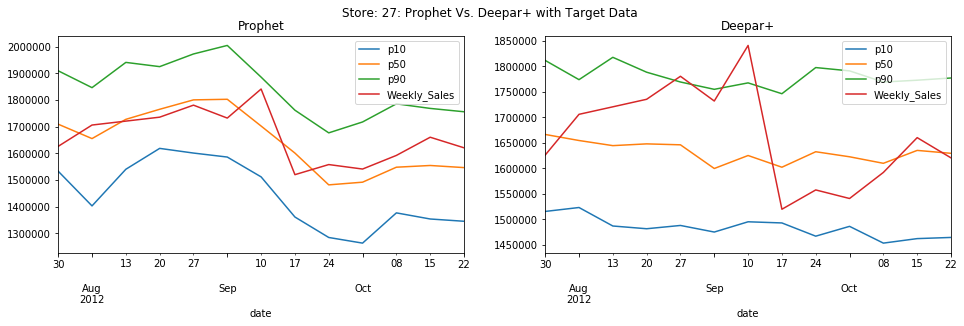

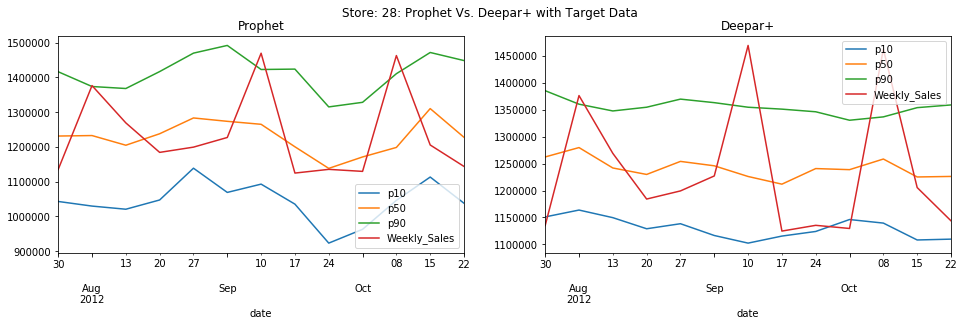

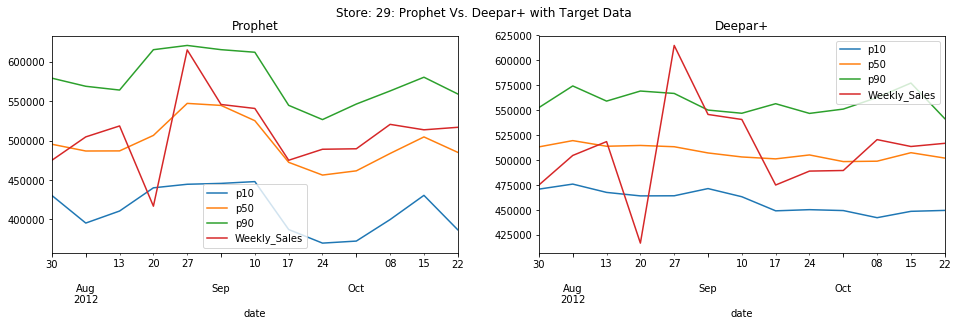

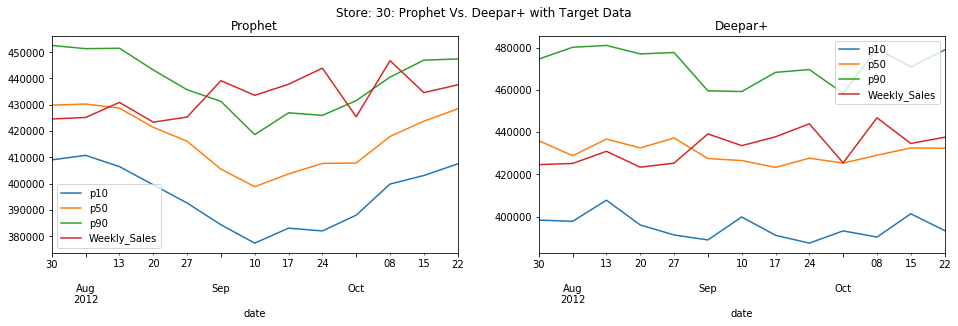

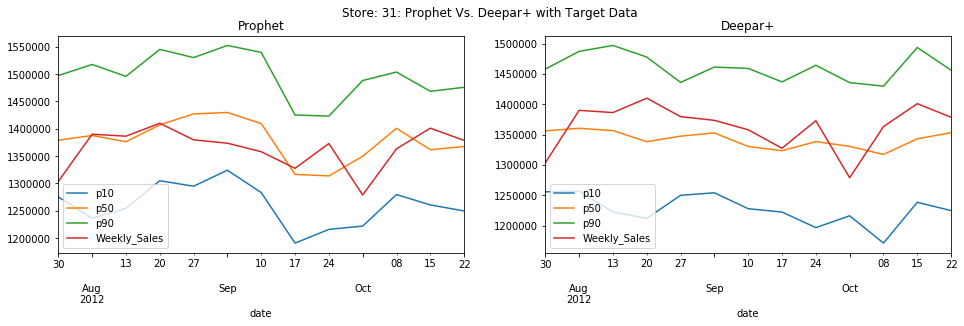

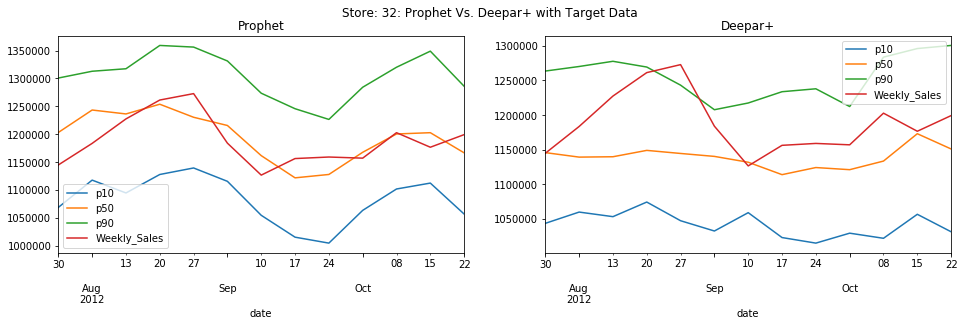

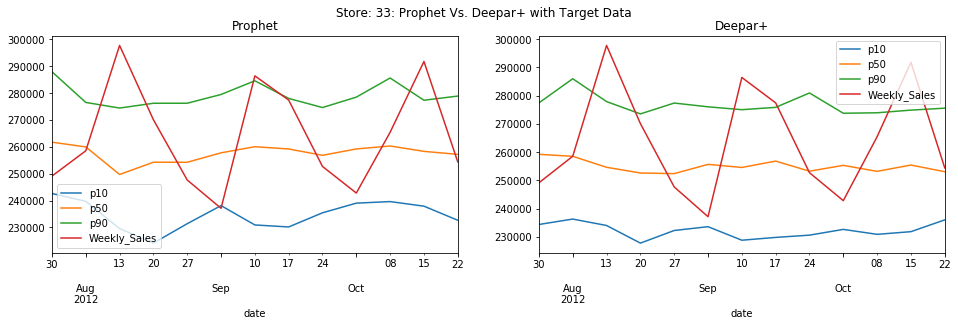

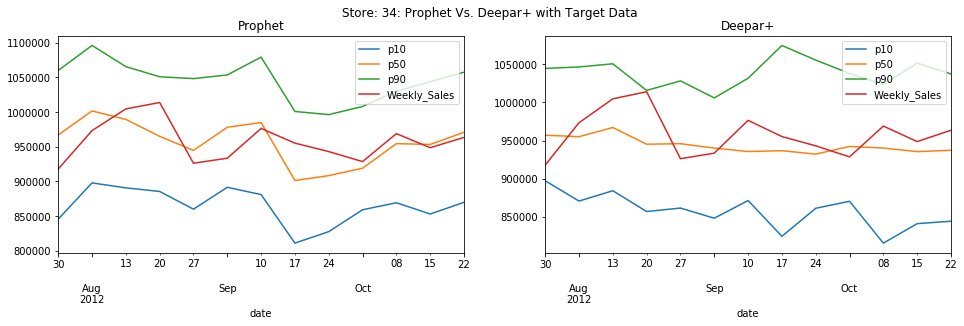

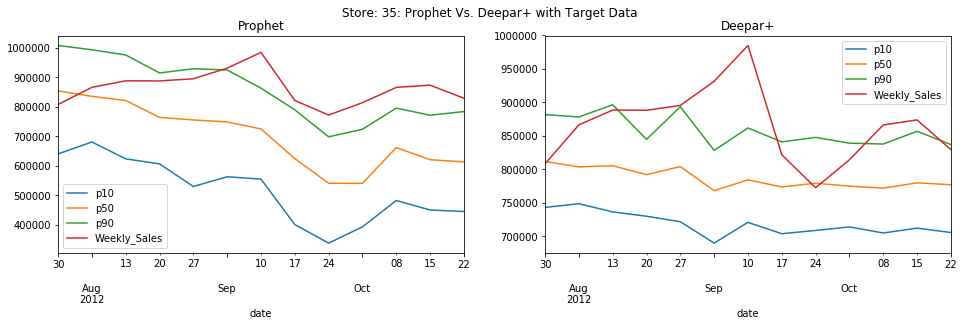

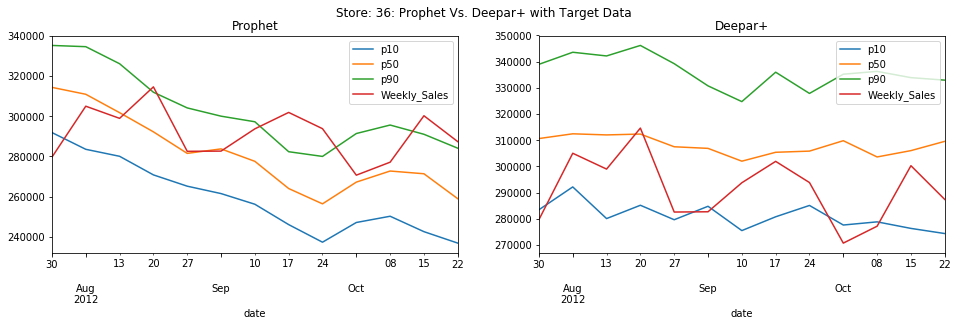

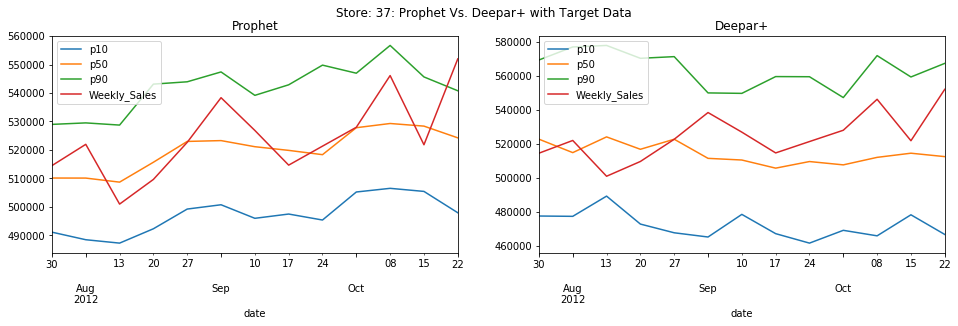

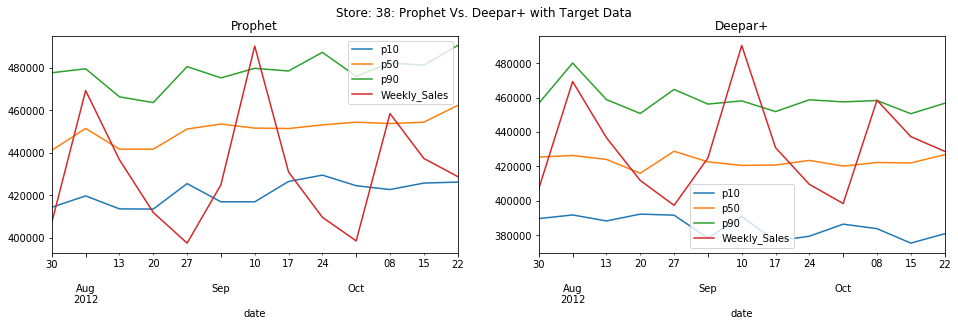

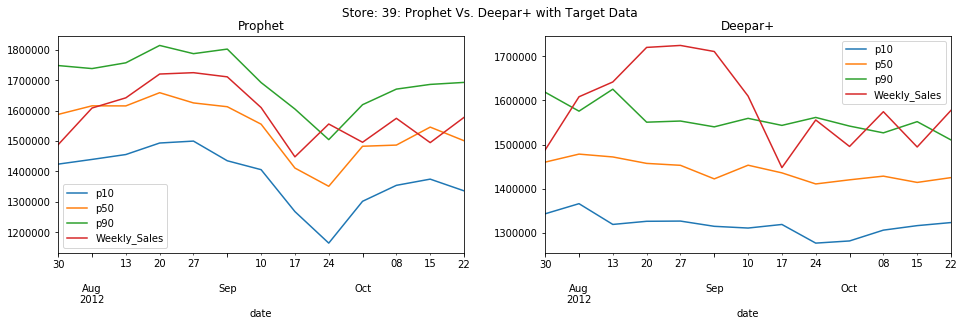

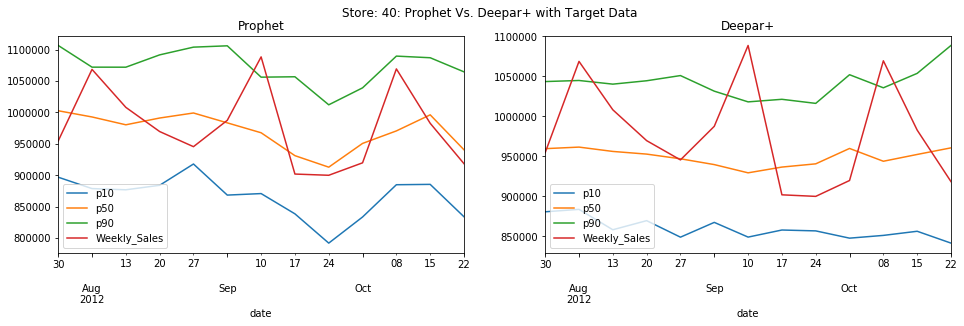

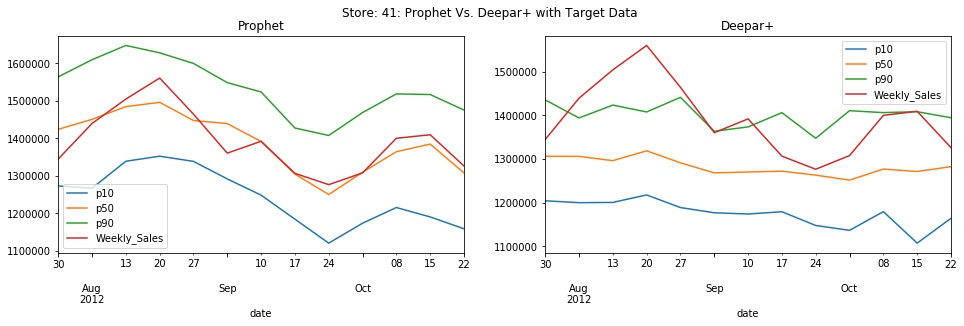

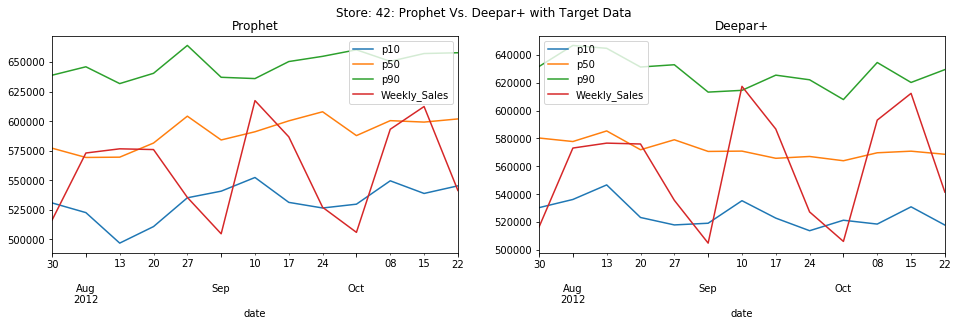

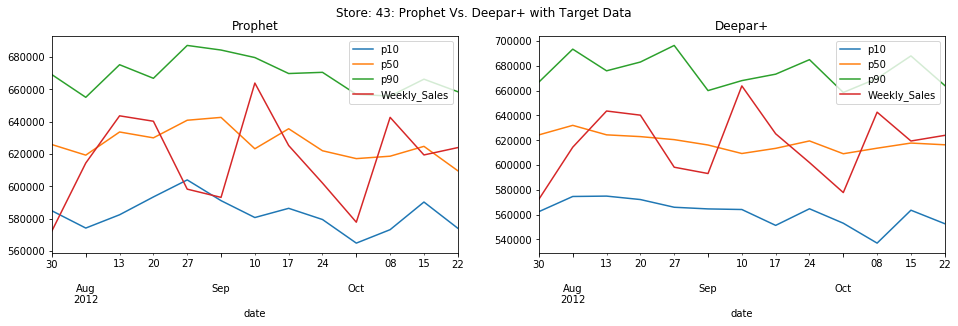

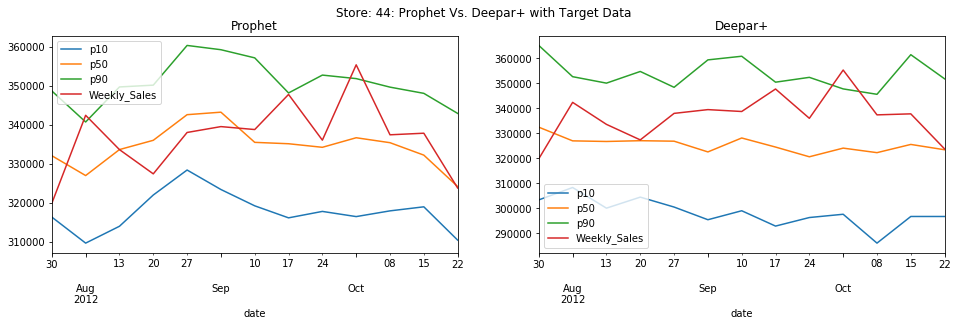

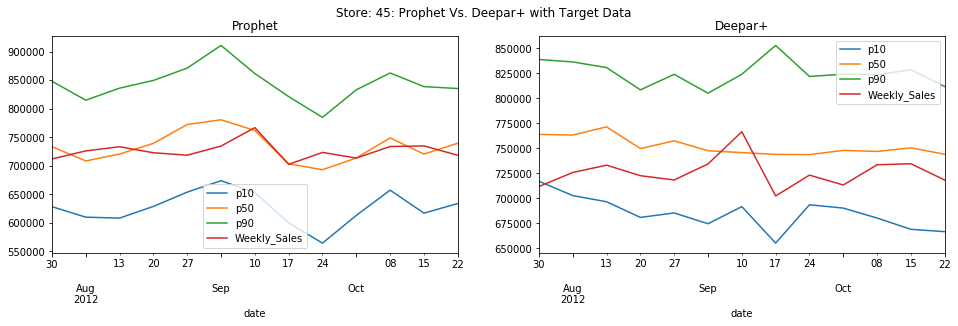

In [97]:
itme_id_list = prophet_val_df.item_id.unique()
itme_id_list = pd.DataFrame(itme_id_list, columns=['item_id'])
itme_id_list.item_id = itme_id_list.item_id.astype('int64')
print(itme_id_list.dtypes)
itme_id_list.item_id.sort_values()

for i in itme_id_list.item_id.sort_values():
#     if i == 3:
#         break;
    prophet_val_single_df = prophet_val_df[prophet_val_df.item_id == str(i)]
    deeparp_val_single_df = deeparp_val_df[deeparp_val_df.item_id == str(i)]    
    plot_title = "Store: " + str(i) + ": Prophet Vs. Deepar+ with Target Data"
    show_two_chart_horizontal(plot_title, 
                          prophet_val_single_df, 
                          "Prophet", 
                          deeparp_val_single_df,
                          "Deepar+", 
                         )
    
    

# prophet_val_df.head()